## EDA 2018 - Kickstarter - Partiel

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import text

## Chargement des données

In [2]:
df = pd.read_csv('dataset.csv',index_col=0)
print(df.shape) #Permet de connaitre le nombre de colonne (catégories) à étudier et le nombre d'individu composants le dataset
df.head()       #Permet de visualiser le début du dataset et se faire une idée des données


(378661, 14)


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


## Valeurs manquantes

In [4]:
df.isna().sum().loc[df.isna().sum()!=0]  #permet de compter le nombre de valeurs manquantes

name              4
usd pledged    3797
dtype: int64

In [5]:
df.isna().sum().loc[df.isna().sum()!=0].apply(lambda x: x*100/378661)

name           0.001056
usd pledged    1.002744
dtype: float64

En passant en pourcentage, on peut relativiser :
0.001% des noms sont manquant et 1% des valeurs de la colonne 'usd pledged' sont manquantes

In [6]:
df[df["name"].isnull()] #Permet d'afficher les données dont les noms sont manquants

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


On peut constater que ces données sont normales sauf pour le nom. On va pouvoir garder ces données

In [7]:
df.groupby(['name']).size().value_counts()

1     373536
2       1858
3        238
4         76
5         29
6         12
8          4
10         3
11         2
9          2
7          2
41         1
13         1
dtype: int64

Il y a beaucoup de noms qui sont répétés.
1858 noms sont répétés 2 fois dans le dataset.

In [8]:
df.duplicated().value_counts()

False    378661
dtype: int64

Malgré tous ces duplicats dans les noms, aucune lignes ne sont strictement identique. On peut donc garder toutes les valeurs.

## Outliers

Text(0.5,1,'répartition des capagnes kickstarter en fonction du nombre de bakers en échelle semi-logarithmique')

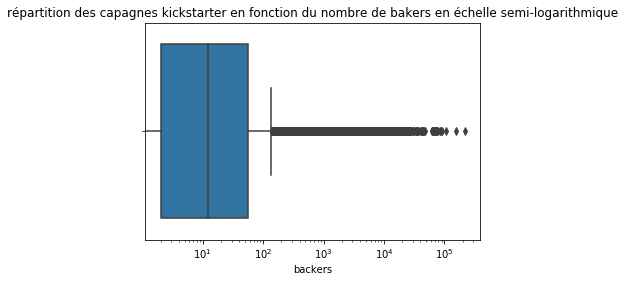

In [9]:
sns.boxplot(df.backers)
plt.semilogx() #En echelle log pour plus de détails
plt.title('répartition des capagnes kickstarter en fonction du nombre de bakers en échelle semi-logarithmique')

In [10]:
print(df.backers.quantile(0.25))
print(df.backers.median())
print(df.backers.quantile(0.75))

2.0
12.0
56.0


La plupart des campagnes ont très peu de supporteurs. 50 % en ont moins de 12, 75% moins de 56.
Il va donc faloir regrouper les grandes valeurs ensemble pour pouvoirs leurs donner un poids et être plus lisibles.

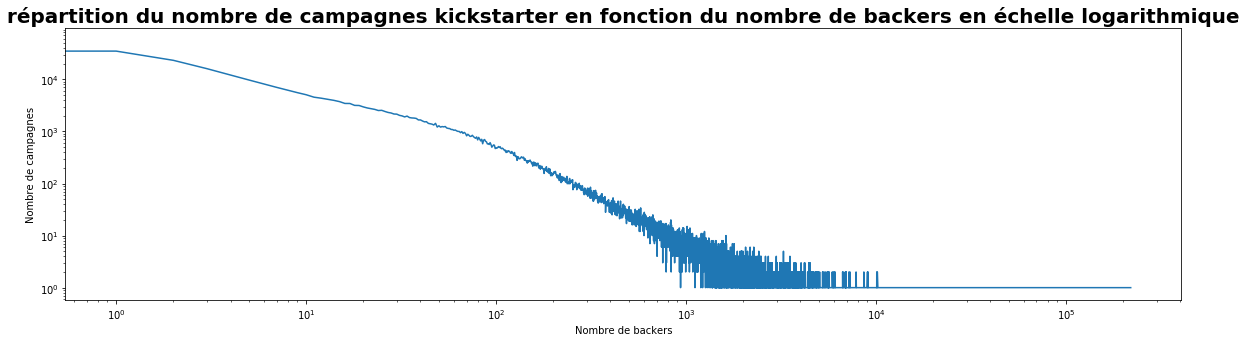

In [27]:
out=df.groupby(['backers']).size()
out.plot(figsize=(20,5))
plt.loglog()
plt.title('Répartition du nombre de campagnes kickstarter en fonction du nombre de backers en échelle logarithmique',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes')
plt.xlabel('Nombre de backers')
plt.show()

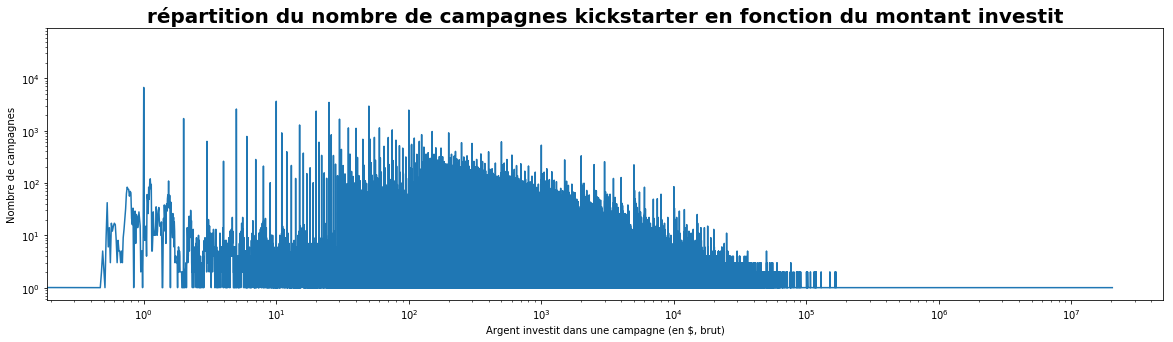

In [12]:
out=df.groupby(['usd_pledged_real']).size()
out.plot(figsize=(20,5))
plt.loglog()
plt.title('Répartition du nombre de campagnes kickstarter en fonction du montant investit',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes')
plt.xlabel('Argent investit dans une campagne (en $, brut)')
plt.show()

La plupart des campagnes récoltent moins de 10 000 $, celles récoltants plus sont moins nombreuses.

## Analyse univariée

### main_category

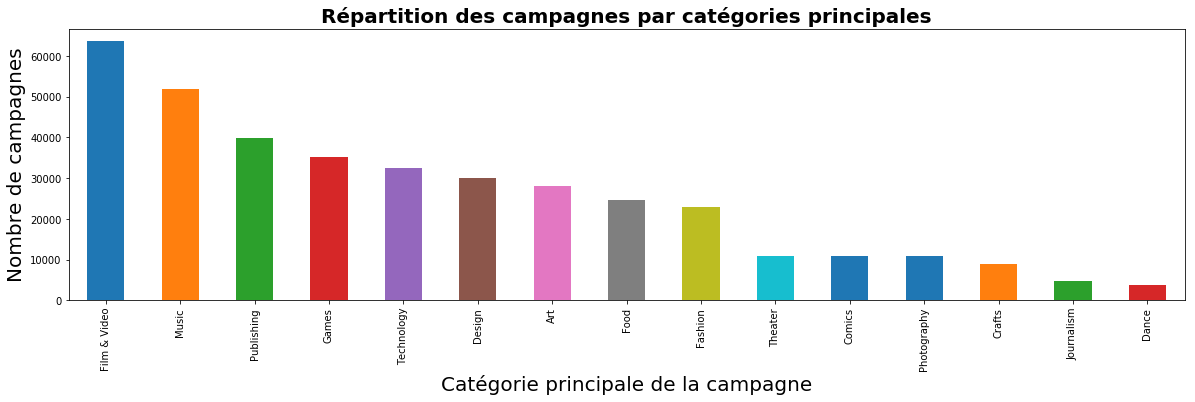

In [13]:
out=df.groupby(['main_category']).size().sort_values(ascending=[False])
out.plot.bar(figsize=(20,5))
plt.title('Répartition des campagnes par catégories principales',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes').set_fontsize(20)
plt.xlabel('Catégorie principale de la campagne').set_fontsize(20)
        
plt.show()

### currency

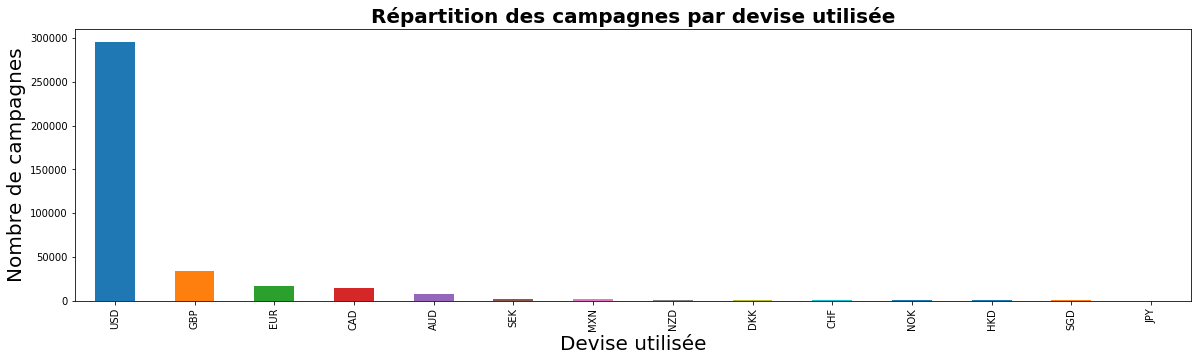

In [14]:
out=df.groupby(['currency']).size().sort_values(ascending=[False])
out.plot.bar(figsize=(20,5))
plt.title('Répartition des campagnes par devise utilisée',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes').set_fontsize(20)
plt.xlabel('Devise utilisée').set_fontsize(20)
        
plt.show()

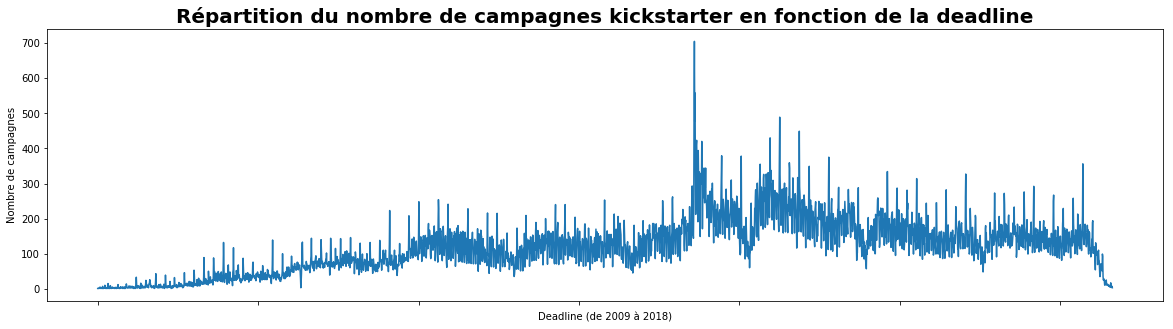

In [29]:
out=df.groupby(['deadline']).size()
out.plot(figsize=(20,5))
plt.title('Répartition du nombre de campagnes kickstarter en fonction de la deadline',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes')
plt.xlabel('Deadline (de 2009 à 2018)')

plt.show()

On peut constater une lente augmentation du nombre de campagne avant d'atteindre un pic. Ce nombre atteint un plateau et ne varie pas trop globalement. Localement, il y a quelques variations extrêmes.

### Etat de la campagne

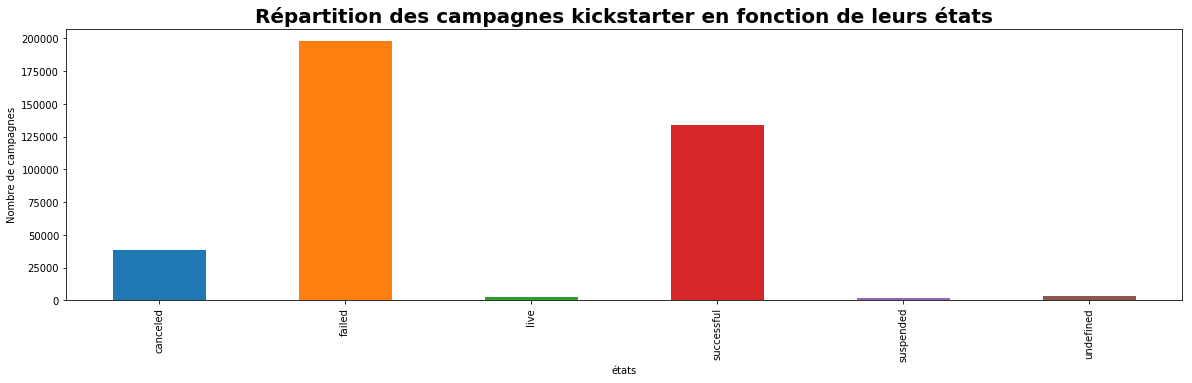

In [16]:
out=df.groupby(['state']).size()
out.plot(figsize=(20,5),kind='bar')
plt.title('Répartition des campagnes kickstarter en fonction de leurs états',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes')
plt.xlabel('états')

plt.show()

In [17]:
df[df['state']=='successful'].state.count()/len(df.state)

0.3537623362321443

Il y a beaucoup d'états possible, et on peut voir que le nombre de campagne réussite n'est pas si élevé que ça. Un pourcentage est plus pratique : il y a 35 % de réussite (sans prendre en compte les projets en cours ~1%)

### But à atteindre

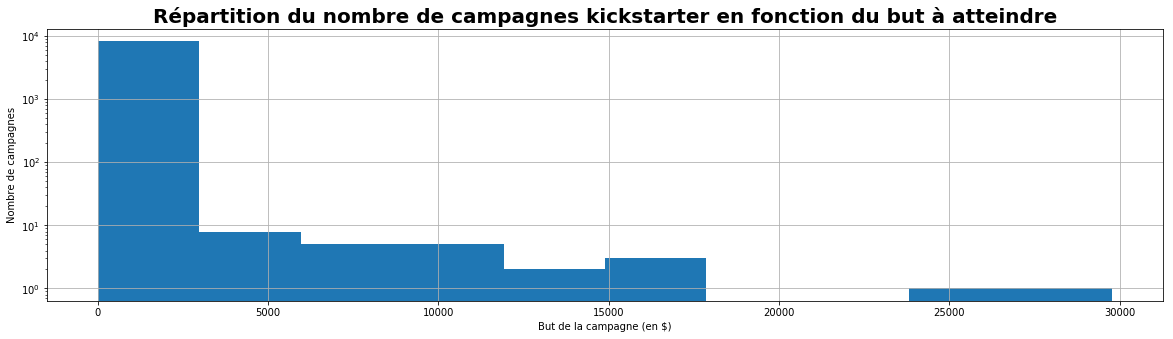

In [18]:
out=df.groupby(['goal']).size()
out.hist(figsize=(20,5))
plt.semilogy()
plt.title('Répartition du nombre de campagnes kickstarter en fonction du but à atteindre',fontweight="bold").set_fontsize(20)
plt.ylabel('Nombre de campagnes')
plt.xlabel('But de la campagne (en $)')

plt.show()

## Analyse multivariée

Certains éléments semble plus interessants à étudier ensemble que d'autres.
On peut par exemple comparer usd_goal_real à goal.
Une autre étude qui peut être interressante est la comparaison usd_pledged et usd_pledged_real en prenant en compte les différentes devises (currency) utilisées

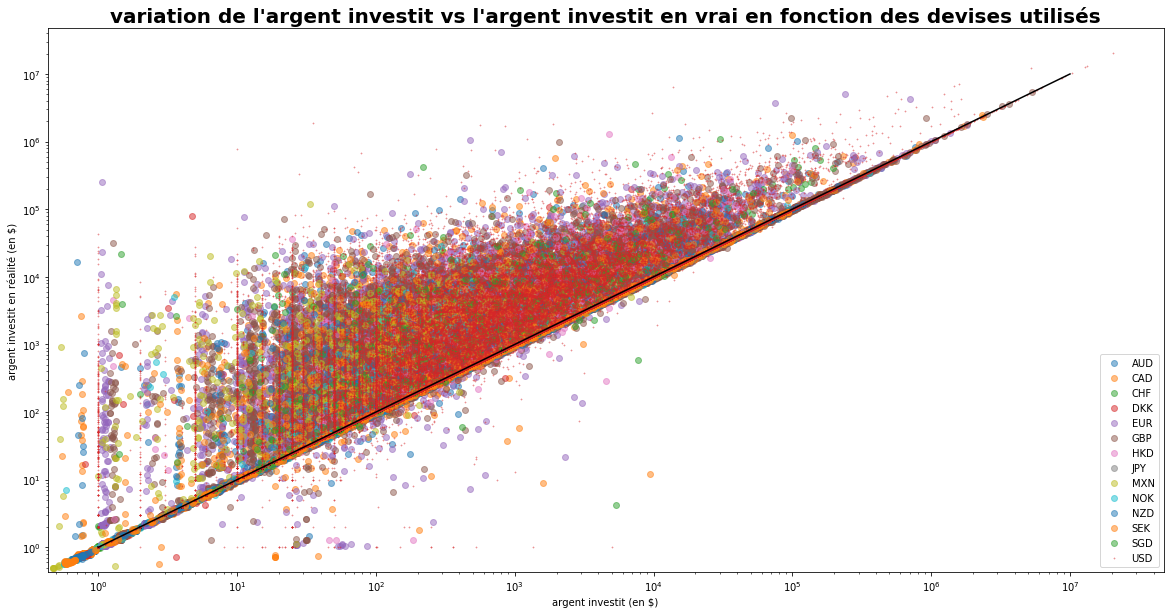

In [19]:
groups=df.groupby(['currency'])['currency','usd pledged','usd_pledged_real']

fig, ax = plt.subplots(figsize=(20,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    if name != 'USD':
        ax.scatter(group['usd pledged'], group['usd_pledged_real'],marker='o', label=name,alpha=0.5)
    else:
        ax.scatter(group['usd pledged'], group['usd_pledged_real'],marker='x', label=name,alpha=0.5,s=0.6)
ax.legend()
ax.loglog()
ax.plot([1,10000000],[1,10000000],'k')
plt.title("variation de l'argent investit vs l'argent investit en vrai en fonction des devises utilisés",fontweight="bold").set_fontsize(20)
plt.ylabel('argent investit en réalité (en $)')
plt.xlabel('argent investit (en $)')
plt.show()

On remarque que l'argent investit en réalité est soit plus grand, soit égale à l'argent investit (sauf exception) et que cela ne varie pas en fonction de la devise.
Par ailleur, on remarque une majorité d'utilisation du dollar dont il a fallut réduire l'empreinte sur le graphe pour plus de clarté.

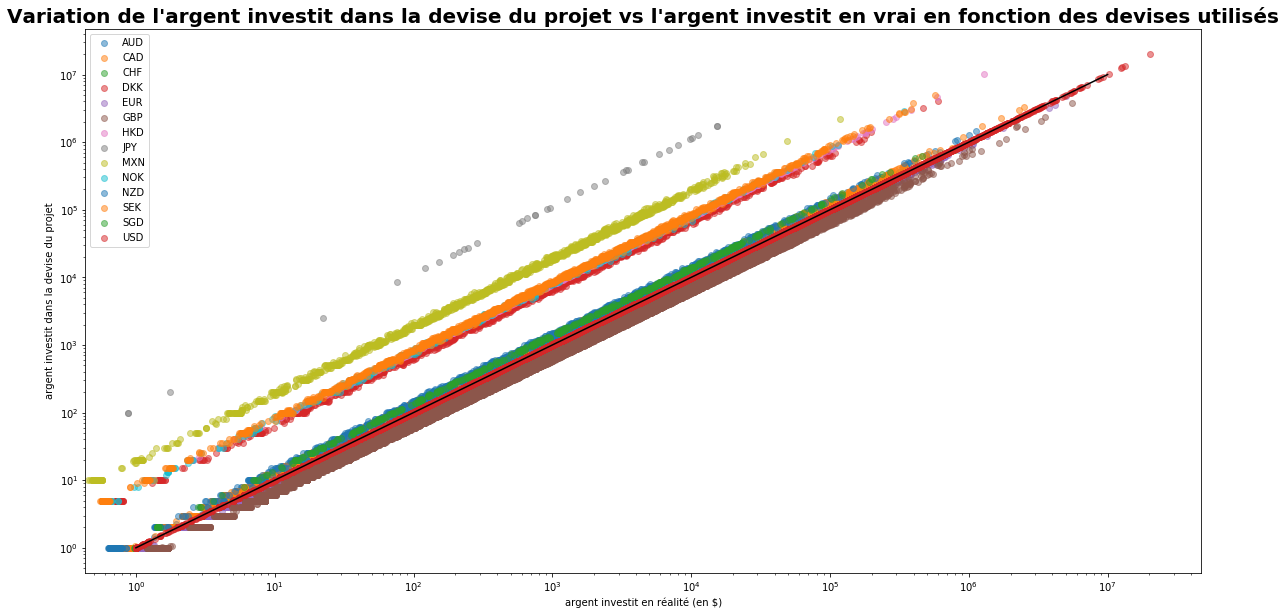

In [20]:
groups=df.groupby(['currency'])['currency','usd_pledged_real','pledged']

fig, ax = plt.subplots(figsize=(20,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.scatter(group['usd_pledged_real'], group['pledged'], label=name,alpha=0.5)
ax.legend()
ax.loglog()
ax.plot([1,10000000],[1,10000000],'k')
plt.title("Variation de l'argent investit dans la devise du projet vs l'argent investit en vrai en fonction des devises utilisés",fontweight="bold").set_fontsize(20)
plt.ylabel('argent investit dans la devise du projet')
plt.xlabel('argent investit en réalité (en $)')
plt.show()

Ici, on a tracé les montants investits dans la devise du projet en fonction de l'argent investit en vrai. On peut donc constater une linéarité pour chaques devise (heureusement) et on voit apparaitre le taux d'échange entre les devises qui est la différence des hauteurs de deux droites.

LES AXES SONT EN LOG/LOG

### Pourcentage de réussite des projets

On va s'interesser aux pourcentage de réussite des projets en fonction des différentes catégories données.

In [21]:
df[df['state']=='successful'].state.count()/len(df.state)

0.3537623362321443

In [22]:
def check(cat):
    df2=df.groupby([cat,'state']).size().reset_index(name='count')    #Nombre d'individu ayant validé dans cette catégorie
    df2['norm_count'] = df2['count'].div(df2.groupby(cat)['count'].transform('sum'))*100   #Pourcentage de réussite dans cette catégorie
    df2['cat_total']=df2['count']*100/df2['norm_count']             #nombre de projet dans cette catégorie (ayant réussit ou non)
    out=df2.drop(df2[df2['state']!='successful'].index,errors='ignore')    #supprime les lignes sans succes (pour l'affichage)
    return out

In [23]:
check('country').head()

,country,state,count,norm_count,cat_total
3,AT,successful,107,17.922948,597.0
8,AU,successful,2010,25.641026,7839.0
13,BE,successful,152,24.635332,617.0
18,CA,successful,4134,28.015722,14756.0
23,CH,successful,187,24.572930,761.0


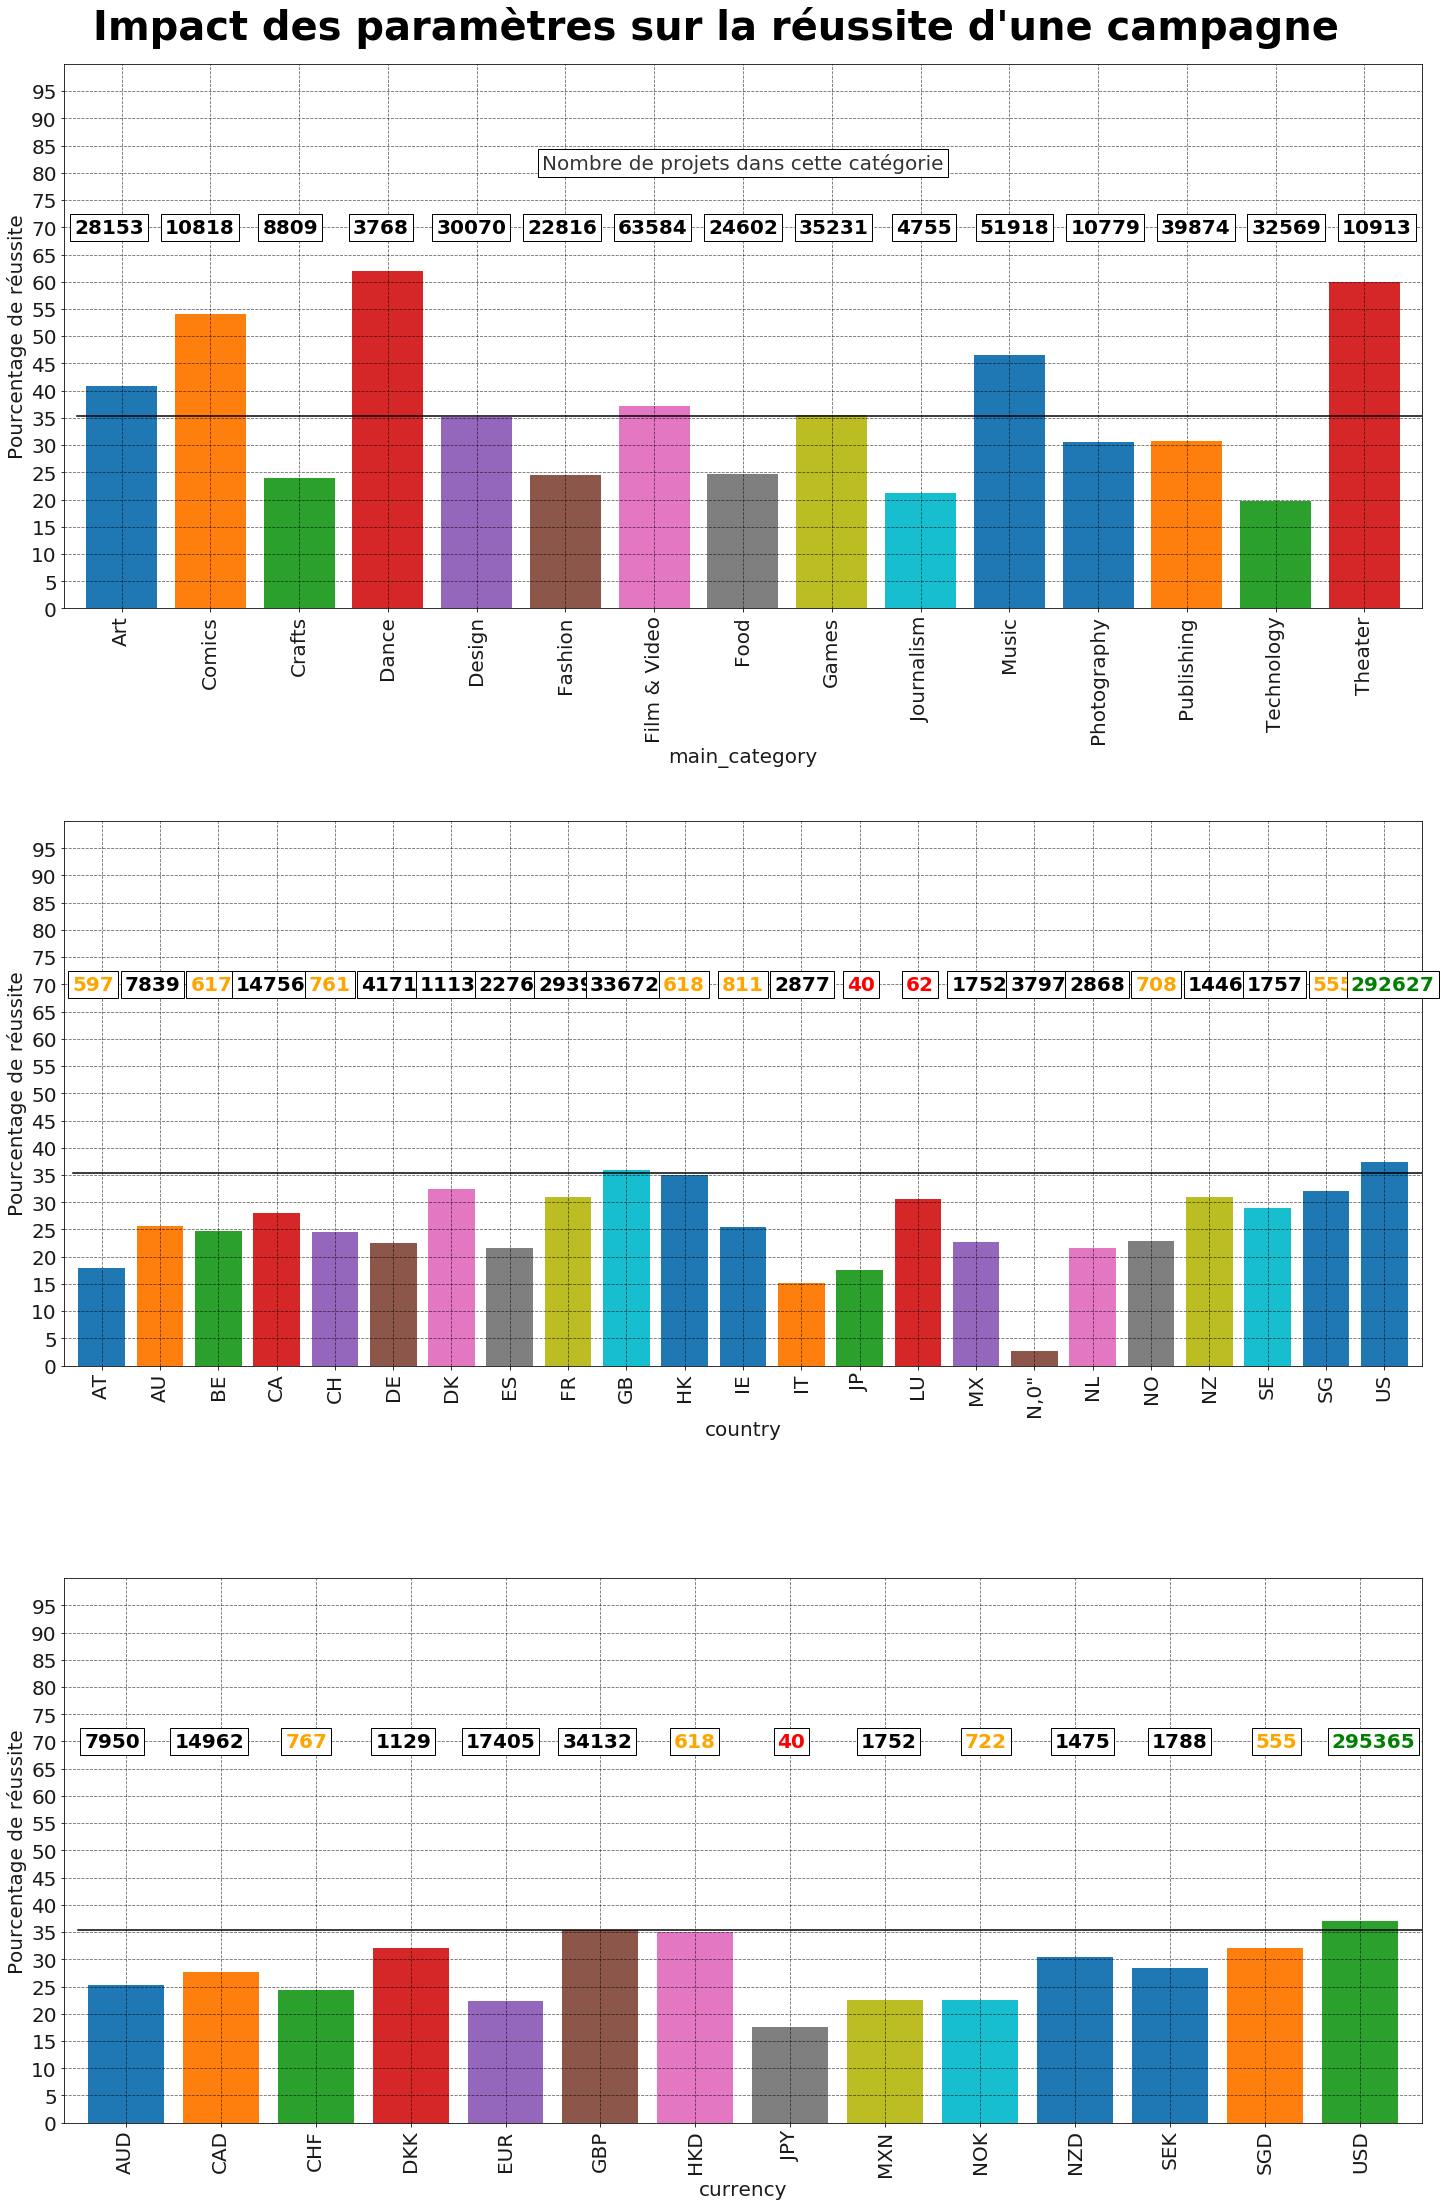

In [24]:
#cindex=list(df)
pourcent_tot=df[df['state']=='successful'].state.count()*100/len(df.state)
cindex=['main_category','country','currency']
fig,ax=plt.subplots(len(cindex),figsize=(20,10*len(cindex)))
fig.suptitle("Impact des paramètres sur la réussite d'une campagne",y=(5*len(cindex)+0.3)/(5*len(cindex)), fontsize=40,fontweight="bold")
text(0.5,0.8,"Nombre de projets dans cette catégorie",bbox=dict(facecolor='white'), ha='center', va='bottom',transform=ax[0].transAxes, fontsize=20,color=[0.2,0.2,0.2])
#Balayer les colonnes étudiées
for index in range(len(cindex)):
    c1=check(cindex[index])
    cnumb=c1[cindex[index]].count()
    ax[index].plot([-0.5,len(c1.norm_count)+0.5],[pourcent_tot,pourcent_tot],'k')
    c1.plot(x=cindex[index],y='norm_count',ax=ax[index],kind='bar',width=0.8,ylim=[0,100],legend=None)
    ax[index].set(ylabel='Pourcentage de réussite')
    ax[index].yaxis.set_ticks(np.arange(0, 100, 5))
    ax[index].grid(color='k',linestyle='--',alpha=0.6)
    
    #Afficher le nombre de projets par catégories
    for i in range(cnumb):
        if int(c1.iloc[i]['cat_total'])<=100 :
            color='red'
        else:
            if int(c1.iloc[i]['cat_total'])<=1000:
                color='orange'
            else:
                if int(c1.iloc[i]['cat_total'])>=len(df.state)/2:
                    color='green'
                else:
                    color='black'
        text( i/cnumb+(1)/(2*cnumb),0.7,int(c1.iloc[i]['cat_total']),bbox=dict(facecolor='white'), ha='center', va='center', transform=ax[index].transAxes, fontsize=20,fontweight="bold",color=color)

    for item in ([ ax[index].xaxis.label, ax[index].yaxis.label] +
               ax[index].get_xticklabels() + ax[index].get_yticklabels()):
        item.set_fontsize(20)
        item.set_color([0.1,0.1,0.1])
plt.tight_layout( h_pad=5)

Les trois graphes représentent le taux de réussite des projets pour chaques catégories. Pour les devise, pour les pays pays et pour les catégorie principal du projet.

La ligne noire représente le taux de réussite de touteles catégories réunies. Ont peut donc comparere chaques catégories (chaque pays par exemple) par rapport au cas moyen.

Au dessus sont affichés les nombres de projets entrant dans la catégorie. Un nombre en rouge (<100) et un nombre en orange (<1000) indiquent une faible population, et donc un pourcentage de réussite à prendre avec précation.
En vert, plus de la moitié des projets sont dans cette catégorie (US ou $USD)

In [25]:
for index in list(df):
    print(index)
    print(len(df[index].value_counts()))
    print()

name
375764

category
159

main_category
15

currency
14

deadline
3164

goal
8353

launched
378089

pledged
62130

state
6

backers
3963

country
23

usd pledged
95455

usd_pledged_real
106065

usd_goal_real
50339



On ne peut afficher avec cette méthode que les colonnes avec peu de catégories différentes. Pour les autres, il va falloir regrouper des valeurs.

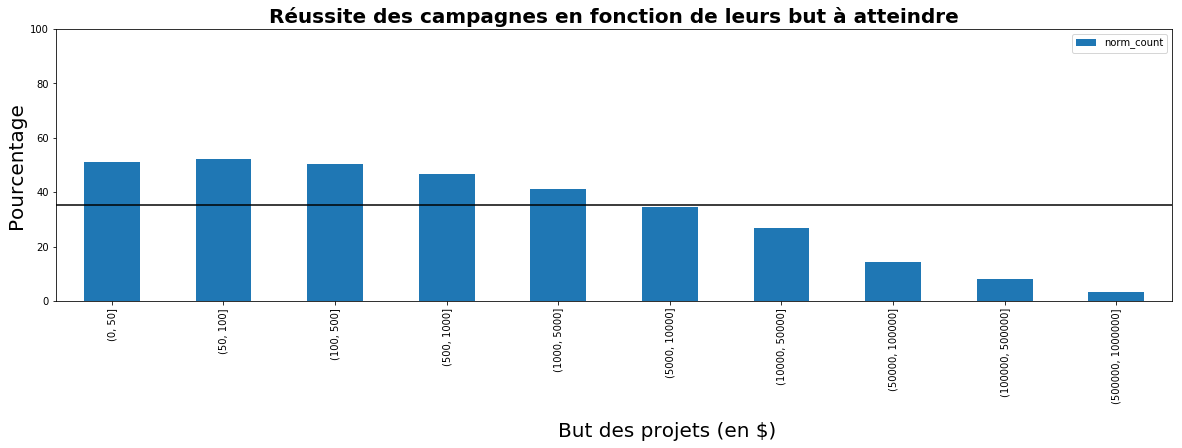

In [26]:
dfgoal=df
bins = [0,50, 100,500, 1000,5000, 10000,50000, 100000,500000,1000000]
dfgoal['bins'] = pd.cut(dfgoal['goal'], bins=bins)
dfgoal2=check('bins')

dfgoal=dfgoal2.drop(['state','count','cat_total'],axis=1)
dfgoal.plot.bar(figsize=(20,5)).set_xticklabels( dfgoal.bins )
plt.ylim([0,100])
plt.plot([-0.5,len(bins)-1.5],[pourcent_tot,pourcent_tot],'k')
plt.title('Réussite des campagnes en fonction de leurs but à atteindre',fontweight="bold").set_fontsize(20)
plt.ylabel('Pourcentage').set_fontsize(20)
text((len(bins)-3)/2,-50,'But des projets (en $)').set_fontsize(20)

plt.show()



On voit ici l'évolution des réussites des projets en fonctions de leurs but à atteindre. On constate que les plus petits projets sont ceux qui ont le plus de chance de réussir.